# Bank Loan Classification

In this data science project I am building the machine learning model using classification algorithms that can accurately classify whether the personal loan was accepted or not based on the information provided.

##  Importing all the necessary libraries

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Experimenting two classification algorithms ie. K Nearest Neighbor classifier and Random forest classifier

In [303]:
df=pd.read_excel("loan_data.xlsx")

## EDA

In [304]:
df.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


Checking and handling the nan and missing values

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              3404 non-null   object 
 3   Experience          5000 non-null   int64  
 4   Income              4933 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      3811 non-null   object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              4960 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

In [306]:
df.isna().sum()

ID                       0
Age                      0
Gender                1596
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [307]:
df.shape

(5000, 16)

In [308]:
df['Gender'].unique()

array(['M', 'F', 'O', nan, '#', '-'], dtype=object)

Remove the rows with # and -

In [309]:
df = df[~df['Gender'].isin(['#', '-'])]

In [310]:
df['Gender'].unique()

array(['M', 'F', 'O', nan], dtype=object)

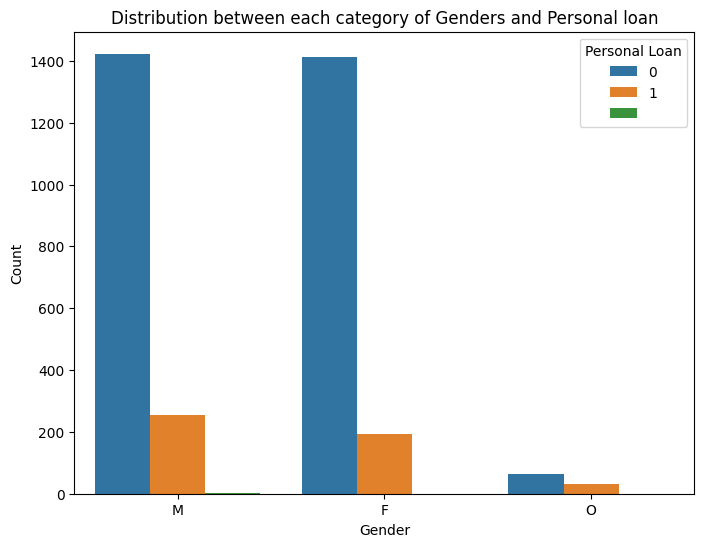

In [311]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Personal Loan')
plt.title('Distribution between each category of Genders and Personal loan')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Not any relation

In [312]:
df["Personal Loan"].unique()

array([0, 1, ' '], dtype=object)

In [313]:
df=df[df['Personal Loan'] != ' ']

In [314]:
from scipy import stats
# Fill NaN with a default value
df['Gender'].fillna('U', inplace=True)

# Convert 'Gender' to numeric
df['Gender_numeric'] = df['Gender'].map({'M': 0, 'F': 1, 'O': 2, 'U': -1})

# Remove any remaining NaN values
df = df.dropna(subset=['Gender_numeric'])

# Calculate point-biserial correlation
correlation = stats.pointbiserialr(df['Gender_numeric'], df['Personal Loan'])
print("Point-biserial correlation coefficient:", correlation.correlation)
print("P-value:", correlation.pvalue)

Point-biserial correlation coefficient: 0.1923869685587113
P-value: 1.0956235819262928e-42


Less p-value shows that gender column is not relatable with the target column. So its okay to remove gender column.

In [315]:
df=df.drop(columns=['Gender'])

In [316]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard,Gender_numeric
0,1,25,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0,0
1,2,45,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0,0
2,3,39,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0,0
3,4,35,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0,0
4,5,35,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40.0,92697,1,1.9,3,0,NaN,0,0,0,1.0,0,-1
4996,4997,30,4,15.0,92037,4,0.4,1,85,NaN,0,0,0,1.0,0,-1
4997,4998,63,39,24.0,93023,2,0.3,3,0,NaN,0,0,0,0.0,0,-1
4998,4999,65,40,49.0,90034,3,0.5,2,0,NaN,0,0,0,1.0,0,-1


In [317]:
df.isna().sum()

ID                       0
Age                      0
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
Gender_numeric           0
dtype: int64

removing the rows with null values that are in Income and online column

In [318]:
df=df.dropna(subset=['Income','Online'])

In [319]:
df.isna().sum()

ID                       0
Age                      0
Experience               0
Income                   0
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                   0
CreditCard               0
Gender_numeric           0
dtype: int64

In [320]:
df['Home Ownership'].unique()

array(['Home Owner', 'Rent', 'Home Mortage', nan], dtype=object)

<AxesSubplot:xlabel='Home Ownership', ylabel='count'>

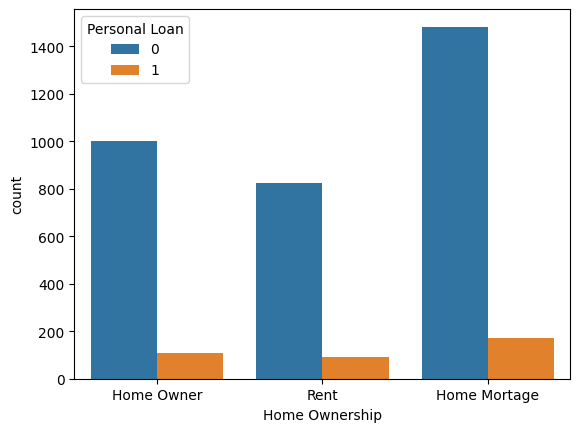

In [321]:
sns.countplot(data=df, x='Home Ownership', hue='Personal Loan')

I dont see any relationship so lets remove this column too.

In [322]:
df['Home Ownership'].fillna('U', inplace=True)

In [323]:
df['HO_numeric'] = df['Home Ownership'].map({'Home Owner': 0, 'Rent Home Onwership': 1, 'Home mortage': 2, 'U': -1})

<AxesSubplot:xlabel='Home Ownership', ylabel='count'>

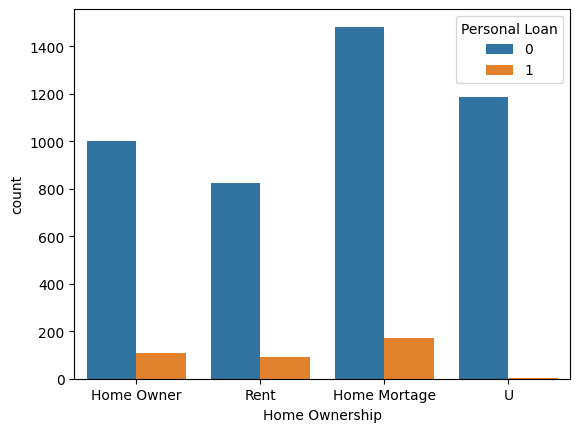

In [324]:
sns.countplot(data=df, x='Home Ownership', hue='Personal Loan')

In [325]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard,Gender_numeric,HO_numeric
0,1,25,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0,0,0.0
1,2,45,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0,0,NaN
2,3,39,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0,0,NaN
3,4,35,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0,0,NaN
4,5,35,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40.0,92697,1,1.9,3,0,U,0,0,0,1.0,0,-1,-1.0
4996,4997,30,4,15.0,92037,4,0.4,1,85,U,0,0,0,1.0,0,-1,-1.0
4997,4998,63,39,24.0,93023,2,0.3,3,0,U,0,0,0,0.0,0,-1,-1.0
4998,4999,65,40,49.0,90034,3,0.5,2,0,U,0,0,0,1.0,0,-1,-1.0


lets remove unnecessary columns

In [326]:
df=df.drop(columns=['ID',"ZIP Code", 'Gender_numeric','HO_numeric', 'Home Ownership'])

In [327]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0,0,1,0,0.0,0
1,45,19,34.0,3,1.5,1,0,0,1,0,0.0,0
2,39,15,11.0,1,1.0,1,0,0,0,0,0.0,0
3,35,9,100.0,1,2.7,2,0,0,0,0,0.0,0
4,35,8,45.0,4,1.0,2,0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,1,1.9,3,0,0,0,0,1.0,0
4996,30,4,15.0,4,0.4,1,85,0,0,0,1.0,0
4997,63,39,24.0,2,0.3,3,0,0,0,0,0.0,0
4998,65,40,49.0,3,0.5,2,0,0,0,0,1.0,0


In [328]:
df['Personal Loan'].unique()

array([0, 1], dtype=object)

In [329]:
df['Personal Loan'] = df['Personal Loan'].astype(int)

In [330]:
highest_age = df['Age'].max()
lowest_age = df['Age'].min()

In [331]:
highest_age

978

In [332]:
lowest_age

2

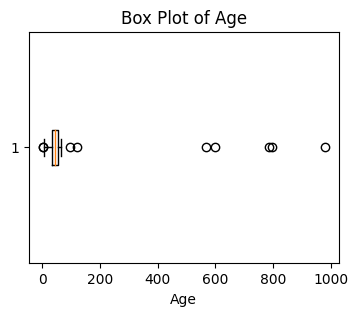

In [333]:
plt.figure(figsize=(4, 3))
plt.boxplot(df['Age'], vert=False)
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

In [334]:
count_age_gt_120 = df[df['Age'] > 120].shape[0]

In [335]:
count_age_gt_120

6

In [336]:
df=df[df['Age'] <= 120]

In [337]:
count_age_gt_120 = df[df['Age'] < 120].shape[0]

In [338]:
count_age_gt_120

4864

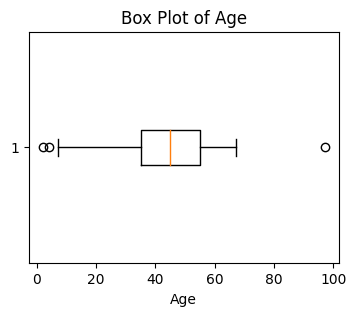

In [339]:
plt.figure(figsize=(4, 3))
plt.boxplot(df['Age'], vert=False)
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

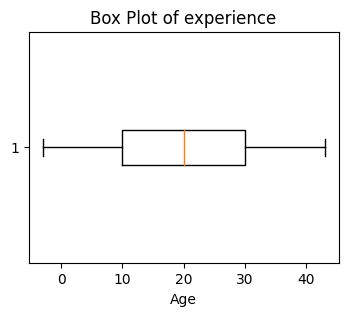

In [340]:
plt.figure(figsize=(4, 3))
plt.boxplot(df['Experience'], vert=False)
plt.xlabel('Age')
plt.title('Box Plot of experience')
plt.show()

In [341]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0,0,1,0,0.0,0
1,45,19,34.0,3,1.5,1,0,0,1,0,0.0,0
2,39,15,11.0,1,1.0,1,0,0,0,0,0.0,0
3,35,9,100.0,1,2.7,2,0,0,0,0,0.0,0
4,35,8,45.0,4,1.0,2,0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,1,1.9,3,0,0,0,0,1.0,0
4996,30,4,15.0,4,0.4,1,85,0,0,0,1.0,0
4997,63,39,24.0,2,0.3,3,0,0,0,0,0.0,0
4998,65,40,49.0,3,0.5,2,0,0,0,0,1.0,0


## Scaling

Scaling using standardscaler. Its basically z-score normalization.
z=(x-u)/sd where x=value, u=mean(0), rho=standard deviation(1)

In [342]:
from sklearn.preprocessing import StandardScaler
columns_to_normalize = ["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage", "Securities Account", "CD Account", "Online"]
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [343]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.759612,-1.666902,-0.514732,1.406927,-0.173648,-1.036886,-0.556841,0,2.915476,-0.239085,-1.215664,0
1,-0.027965,-0.097361,-0.847526,0.534726,-0.232120,-1.036886,-0.556841,0,2.915476,-0.239085,-1.215664,0
2,-0.547459,-0.446148,-1.357810,-1.209678,-0.524481,-1.036886,-0.556841,0,-0.342997,-0.239085,-1.215664,0
3,-0.893788,-0.969329,0.616768,-1.209678,0.469547,0.154003,-0.556841,0,-0.342997,-0.239085,-1.215664,0
4,-0.893788,-1.056525,-0.603477,1.406927,-0.524481,0.154003,-0.556841,0,-0.342997,-0.239085,-1.215664,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.413283,-1.492509,-0.714408,-1.209678,0.001769,1.344892,-0.556841,0,-0.342997,-0.239085,0.822595,0
4996,-1.326700,-1.405312,-1.269065,1.406927,-0.875314,-1.036886,0.297704,0,-0.342997,-0.239085,0.822595,0
4997,1.530518,1.646573,-1.069389,-0.337476,-0.933787,1.344892,-0.556841,0,-0.342997,-0.239085,-1.215664,0
4998,1.703683,1.733770,-0.514732,0.534726,-0.816842,0.154003,-0.556841,0,-0.342997,-0.239085,0.822595,0


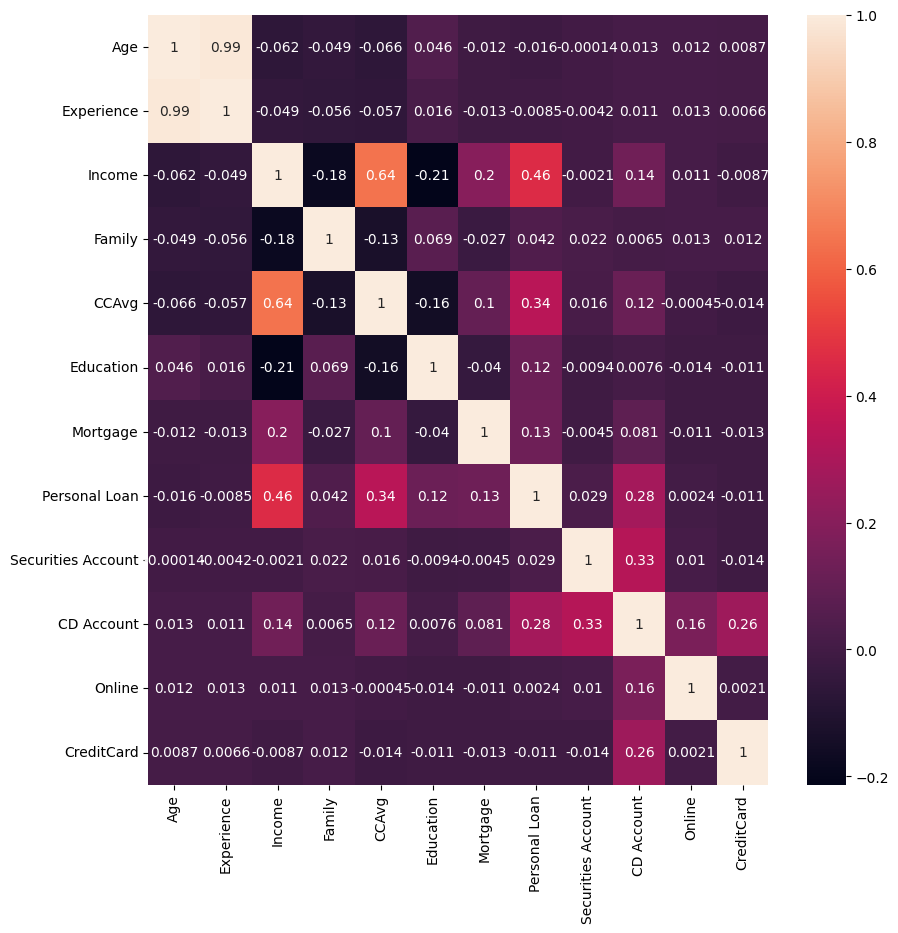

In [366]:
import seaborn as sns
cor = df.corr()
top_corr_features = cor.index
plt.figure(figsize=(10,10))
sns=sns.heatmap(df[top_corr_features].corr(), annot=True)

## Checking if the target is balance or not

In [345]:
count=df['Personal Loan'].value_counts()
count

0    4496
1     368
Name: Personal Loan, dtype: int64

<AxesSubplot:>

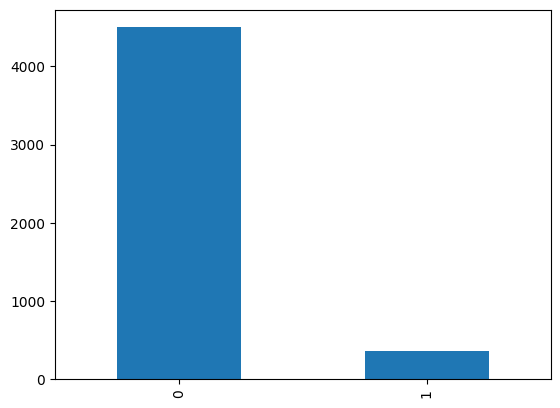

In [346]:
count.plot(kind='bar')

Here, we can see huge class imbalance in the dataset. So common approaches to address this imbalance is to apply resampling techniques ie oversampling or undersampling.  
Oversampling: Duplicate samples from the minority class to balance the class distribution.  
Undersampling: Reduce the number of samples from the majority class to balance the class distribution.

Let's proceed with a single technique for handling imbalanced classes. I will be doing oversampling with resample of sci-kit learn.

In [347]:
from sklearn.utils import resample

majority_class = df[df['Personal Loan'] == 0]
minority_class = df[df['Personal Loan'] == 1]

# Oversampling the minority class
oversampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=40)

# Combine oversampled minority class with majority class
oversampled_df = pd.concat([majority_class, oversampled_minority])

# Shuffle the dataset
oversampled_df = oversampled_df.sample(frac=1, random_state=40).reset_index(drop=True)

# Check the class distribution
print(oversampled_df['Personal Loan'].value_counts())


1    4496
0    4496
Name: Personal Loan, dtype: int64


In [348]:
oversample_count=oversampled_df['Personal Loan'].value_counts()
oversample_count

1    4496
0    4496
Name: Personal Loan, dtype: int64

<AxesSubplot:>

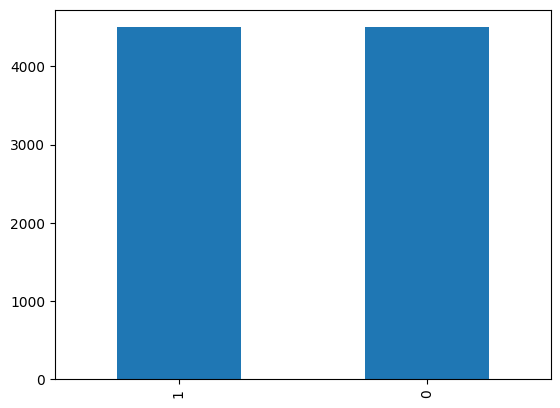

In [349]:
oversample_count.plot(kind='bar')

Heatmap showing the correation between each attributes

In [350]:
df1=oversampled_df

## Applying Logistic regression

In [351]:
y=df1["Personal Loan"]
X=df1.drop(["Personal Loan"], axis=1)

In [352]:
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1.357353,0.948999,1.282357,-0.337476,0.411075,1.344892,-0.556841,-0.342997,-0.239085,-1.215664,0
1,1.617100,1.733770,0.439278,-0.337476,-1.109203,1.344892,1.303050,2.915476,-0.239085,0.822595,0
2,-1.153536,-1.230919,0.883004,1.406927,-0.056703,0.154003,-0.556841,-0.342997,-0.239085,0.822595,0
3,-0.027965,-0.097361,1.104867,1.406927,1.288158,0.154003,-0.556841,-0.342997,-0.239085,0.822595,0
4,0.231782,0.164229,0.927376,-1.209678,0.294130,1.344892,-0.556841,-0.342997,-0.239085,0.822595,0
...,...,...,...,...,...,...,...,...,...,...,...
8987,0.578112,0.687409,2.125435,0.534726,2.691492,1.344892,0.629468,-0.342997,-0.239085,0.822595,0
8988,1.097606,1.036196,-0.625663,-1.209678,-0.641425,0.154003,-0.556841,-0.342997,-0.239085,-1.215664,0
8989,-1.673030,-1.754099,1.326729,0.534726,2.691492,1.344892,-0.556841,-0.342997,-0.239085,-1.215664,1
8990,0.751276,0.687409,2.169808,-0.337476,2.516075,0.154003,2.710534,-0.342997,-0.239085,0.822595,0


In [353]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [354]:
#Preparing the model
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)
train_accuracy_LR=modelLR.score(X_train,y_train)
test_accuracy_LR=modelLR.score(X_test,y_test)

In [355]:
train_accuracy_LR

0.8932295287084666

In [356]:
test_accuracy_LR

0.8888271261812117

The model is a good fit.Since the accuracy for training and test data are nearly equal.

# SVM

I have trained a logistic regression model and achieved an accuracy of 87%. This high accuracy suggests that our data is linearly separable. So we can set the kernel as 'linear' in SVM classifier.

In [357]:
from sklearn.svm import SVC
modelSVM = SVC(kernel="linear")
modelSVM.fit(X_train, y_train)

SVC(kernel='linear')

In [358]:
train_accuracy_SVM=modelSVM.score(X_train,y_train)
test_accuracy_SVM=modelSVM.score(X_test,y_test)

In [359]:
train_accuracy_SVM

0.8905880717364104

In [360]:
test_accuracy_SVM

0.8910505836575876

The accuracy for SVM model is also good.

Text(0.5, 1.0, 'Comparison of Logistic, SVM')

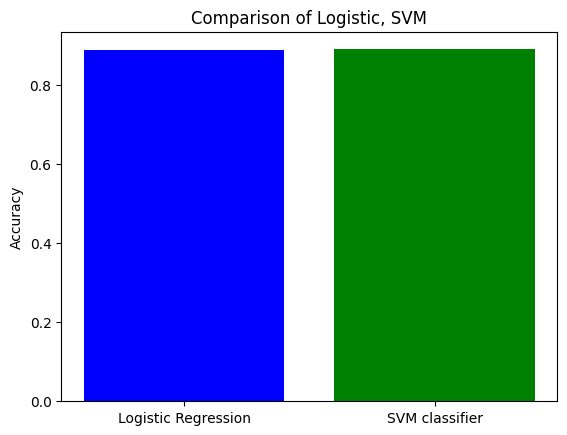

In [361]:
plt.bar(['Logistic Regression'], [test_accuracy_LR], label='LR', color='blue')
plt.bar(['SVM classifier'], [test_accuracy_SVM], label='SVM', color='green')


plt.ylabel('Accuracy')
plt.title('Comparison of Logistic, SVM')

## Conclusion

Here, the accuracy given by the logistic regression is 87% whereas the accuracy of the SVM is 89%. So we can see that SVM classifies more accurately compared to logistic regression.